In [1]:
import os
import re

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.collocations import *

In [3]:
import pandas as pd
import numpy as np

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Read the text

In [5]:
path =  "C:\\Users\\Indalytics Advisors\\Documents\\Python Scripts\\resumes\\Data Analyst"

In [6]:
os.chdir(path)

In [7]:
with open('data_analyst.txt') as f:
    data = f.read()

### Convert the text to lowercase 

In [8]:
data = data.lower()

### Finding total number of words and punctuation in the text

In [9]:
tokens = nltk.word_tokenize(data)

In [10]:
print(len(tokens))

9848


### Removing Stop-words

In [11]:
stop = set(stopwords.words('english'))

In [12]:
token_list1 = [ ]

In [13]:
for token in tokens:
    if token not in stop:
        token_list1.append(token)

In [14]:
print(len(token_list1))

7149


### Removing punctuation

In [15]:
punctuation = re.compile(r'[-.?!,":;()|0-9]')

In [16]:
token_list2 = [ ]

In [17]:
for token in token_list1:
    word = punctuation.sub("", token)
    if len(word)>0:
        token_list2.append(word)

In [18]:
print(len(token_list2))

6359


### Finding POS tags of words

In [19]:
tokens_pos_tag = nltk.pos_tag(token_list2)

In [20]:
pos_df = pd.DataFrame(tokens_pos_tag, columns = ('word','POS'))

In [21]:
pos_df.head()

,word,POS
0,maintain,NN
1,validate,NN
2,equity,NN
3,fixedincome,VBP
4,security,NN


In [22]:
pos_sum = pos_df.groupby('POS', as_index=False).count() # group by POS tags

In [23]:
pos_sum.sort_values(['word'], ascending=[False]) # in descending order of number of words per tag

,POS,word
10,NN,2309
12,NNS,1304
6,JJ,1147
21,VBG,437
23,VBP,402
15,RB,184
22,VBN,131
19,VB,107
24,VBZ,94
20,VBD,93


In [24]:
print (tokens_pos_tag)

[('maintain', 'NN'), ('validate', 'NN'), ('equity', 'NN'), ('fixedincome', 'VBP'), ('security', 'NN'), ('data', 'NNS'), ('including', 'VBG'), ('pricing', 'NN'), ('ensure', 'VB'), ('consistency', 'NN'), ('investment', 'NN'), ('data', 'NNS'), ('across', 'IN'), ('multiple', 'JJ'), ('business', 'NN'), ('applications', 'NNS'), ('databases', 'VBZ'), ('work', 'NN'), ('closely', 'RB'), ('business', 'NN'), ('teams', 'NNS'), ('ensure', 'VB'), ('data', 'NNS'), ('integrity', 'NN'), ('define', 'NN'), ('process', 'NN'), ('improvements', 'NNS'), ('respond', 'VB'), ('data', 'NNS'), ('requests', 'NNS'), ('support', 'VBP'), ('analytic', 'JJ'), ('investing', 'VBG'), ('portfolio', 'NN'), ('management', 'NN'), ('functions', 'NNS'), ('analyze', 'VBP'), ('exception', 'NN'), ('reports', 'NNS'), ('followup', 'JJ'), ('ensure', 'VB'), ('timely', 'JJ'), ('resolution', 'NN'), ('analyze', 'IN'), ('user', 'JJ'), ('requests', 'NNS'), ('respond', 'VBP'), ('data', 'NNS'), ('issues', 'NNS'), ('assessment', 'JJ'), ('reso

### filtering nouns out of all the words

In [25]:
filtered_pos = [ ]

In [26]:
for one in tokens_pos_tag:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
        filtered_pos.append(one)
        

In [27]:
print (len(filtered_pos))

3631


### Finding most frequent words

In [28]:
fdist_pos = nltk.FreqDist(filtered_pos)

In [29]:
top_100_words = fdist_pos.most_common(100)

In [30]:
print(top_100_words)

[(('data', 'NNS'), 236), (('experience', 'NN'), 117), (('skills', 'NNS'), 83), (('ability', 'NN'), 83), (('business', 'NN'), 73), (('analysis', 'NN'), 51), (('work', 'NN'), 48), (('management', 'NN'), 39), (('years', 'NNS'), 35), (('knowledge', 'NN'), 31), (('reports', 'NNS'), 31), (('quality', 'NN'), 29), (('communication', 'NN'), 25), (('support', 'NN'), 25), (('requirements', 'NNS'), 24), (('team', 'NN'), 23), (('environment', 'NN'), 23), (('design', 'NN'), 22), (('product', 'NN'), 22), (('tools', 'NNS'), 22), (('projects', 'NNS'), 21), (('systems', 'NNS'), 20), (('analyst', 'NN'), 20), (('sql', 'NN'), 18), (('project', 'NN'), 18), (('sources', 'NNS'), 17), (('health', 'NN'), 17), (('statistics', 'NNS'), 17), (('process', 'NN'), 17), (('dashboards', 'NNS'), 17), (('office', 'NN'), 16), (('asset', 'NN'), 16), (('information', 'NN'), 16), (('opportunities', 'NNS'), 15), (('software', 'NN'), 15), (('analytics', 'NNS'), 15), (('computer', 'NN'), 15), (('time', 'NN'), 15), (('field', 'NN

In [31]:
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))

In [32]:
top_words_df.head()

,pos,count
0,"(data, NNS)",236
1,"(experience, NN)",117
2,"(skills, NNS)",83
3,"(ability, NN)",83
4,"(business, NN)",73


In [33]:
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) # split the tuple of POS

In [34]:
top_words_df = top_words_df.drop('pos', 1) # drop the previous column

In [66]:
top_words_df.head()

,count,Word
0,236,data
1,117,experience
2,83,skills
3,83,ability
4,73,business


In [36]:
subset_pos = top_words_df[['Word', 'count']]

In [37]:
tuples_pos = [tuple(x) for x in subset_pos.values]

In [38]:
wordcloud = WordCloud()

In [39]:
wordcloud.generate_from_frequencies(tuples_pos)

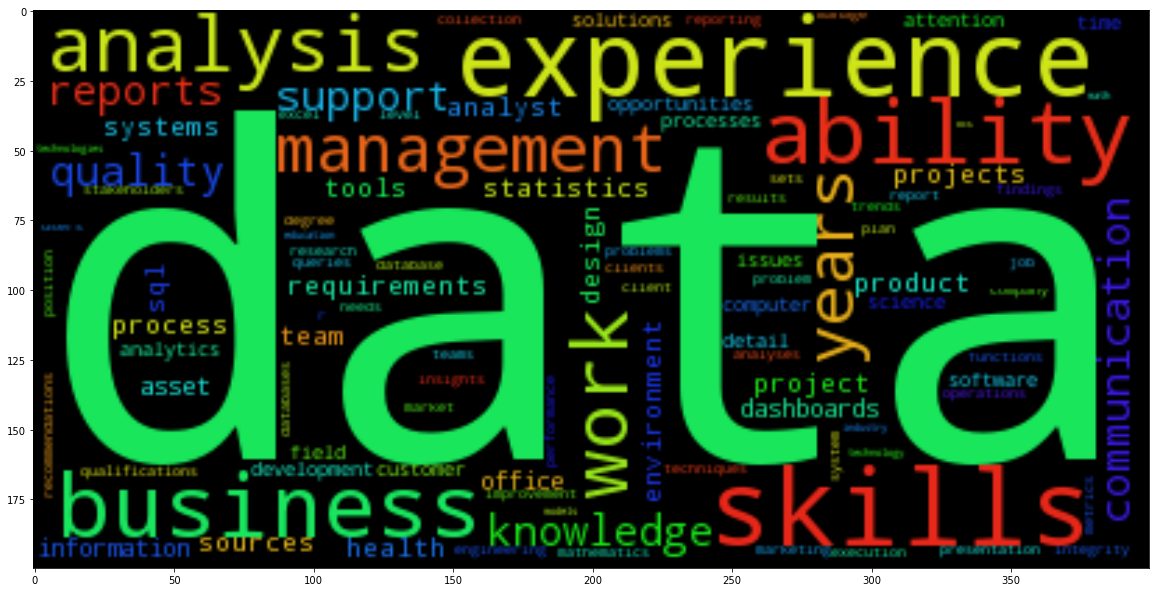

In [40]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")

plt.show()

### Finding most frequent phrases

#### _For filtering the bigrams and trigrams, we should consider the original text (before cleaning it) as removing stop-words, numbers or punctuation breaks the original sentences._ 

#### Bigrams

In [41]:
bgs = nltk.bigrams(tokens) 

In [42]:
fdist2 = nltk.FreqDist(bgs) # selecting bigrams from tokens

In [43]:
bgs_100 = fdist2.most_common(100) # top-100 bigrams

In [44]:
bgs_df = pd.DataFrame(bgs_100, columns = ('bigram','count'))

In [45]:
bgs_df.head()

,bigram,count
0,"(ability, to)",79
1,"(,, and)",74
2,"(experience, with)",41
3,"(in, a)",35
4,"(to, work)",28


In [46]:
bgs_df['phrase'] = bgs_df['bigram'].apply(lambda x: x[0]+" "+x[1]) # merging the tuple into a string

In [47]:
bgs_df['filter_bgs'] = bgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation

In [48]:
bgs_df.head()

,bigram,count,phrase,filter_bgs
0,"(ability, to)",79,ability to,False
1,"(,, and)",74,", and",True
2,"(experience, with)",41,experience with,False
3,"(in, a)",35,in a,False
4,"(to, work)",28,to work,False


In [49]:
bgs_df = bgs_df[bgs_df.filter_bgs == False] # removing strings with numbers and punctuation

In [50]:
bgs_df = bgs_df.drop('bigram', 1)
bgs_df = bgs_df.drop('filter_bgs', 1) # removing the excess columns

In [51]:
bgs_df.reset_index()
bgs_df.head(10) #Final bigrams

,count,phrase
0,79,ability to
2,41,experience with
3,35,in a
4,28,to work
5,26,years of
6,26,knowledge of
7,22,such as
8,22,of data
9,21,and data
10,20,with the


#### Trigrams

In [52]:
tgs = nltk.trigrams(tokens) 

In [53]:
fdist3 = nltk.FreqDist(tgs) # selecting trigrams from tokens

In [54]:
tgs_100 = fdist3.most_common(100) # top-100 trigrams

In [55]:
tgs_df = pd.DataFrame(tgs_100, columns = ('trigram','count'))

In [56]:
tgs_df.head()

,trigram,count
0,"(ability, to, work)",14
1,"(attention, to, detail)",13
2,"(the, ability, to)",13
3,"(years, of, experience)",10
4,"(,, statistics, ,)",9


In [57]:
tgs_df['phrase'] = tgs_df['trigram'].apply(lambda x: x[0]+" "+x[1]+" "+x[2]) # merging the tuple into a string

In [58]:
tgs_df['filter_tgs'] = tgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation

In [59]:
tgs_df.head()

,trigram,count,phrase,filter_tgs
0,"(ability, to, work)",14,ability to work,False
1,"(attention, to, detail)",13,attention to detail,False
2,"(the, ability, to)",13,the ability to,False
3,"(years, of, experience)",10,years of experience,False
4,"(,, statistics, ,)",9,", statistics ,",True


In [60]:
tgs_df = tgs_df[tgs_df.filter_tgs == False] # removing strings with numbers and punctuation

In [61]:
tgs_df = tgs_df.drop('trigram', 1)
tgs_df = tgs_df.drop('filter_tgs', 1) # removing the excess columns

In [62]:
tgs_df.reset_index()
tgs_df.head(20) #Final trigrams

,count,phrase
0,14,ability to work
1,13,attention to detail
2,13,the ability to
3,10,years of experience
6,8,to work in
8,7,as well as
10,6,written communication skills
11,6,a data analyst
12,6,able to work
13,6,experience with sql


### _— Abhishek Chhibber_